In [1]:
import pandas as pd

data = pd.read_csv('data_session', header = None, delimiter = " ")
data.head()

,0,1,2,3,4,5
0,1390209860,1,1,0,1,1
1,1390209861,2,2,1,1,1
2,1390209864,3,3,3,1,1
3,1390209864,4,4,4,1,1
4,1390209866,5,5,6,1,1


In [2]:
t0 = data[0][0]
day = 86400
numberOfDaysForTrain = 31
t1 = t0 + int(day * numberOfDaysForTrain)

numberOfDaysForTest = 14
t2 = t1 + day*numberOfDaysForTest

numTotalUsers = len(data[1].unique())

In [3]:
data = data[data[0] <= t2]
data_train = data[data[0] <= t1]
data_test = data[data[0] > t1]

In [4]:
print(len(data_train[1]))
print(len(data_train[1].unique()))
print(len(data_train[2].unique()))
print(data_train[2].max())
print(float(len(data_train[2].unique())) / data_train[2].max())

69064
12547
19048
46722
0.407688027054


In [5]:
stats_over_test_days = data_test.groupby(1).size()
numTestUsers = len(data_test[1].unique())

In [6]:
print(stats_over_test_days.min())
print(stats_over_test_days.max())
print(stats_over_test_days.mean())
print(stats_over_test_days.quantile(0.5))
print(stats_over_test_days.quantile(0.75))
print(stats_over_test_days.quantile(0.85))

1
29
3.5627658115
3.0
5.0
6.0


In [7]:
print("#users in train: ")
print(len(data_train[1].unique()))
print("#users in test: ")
print(len(data_test[1].unique()))
print("#users in both: ")
print(len(set(data_test[1].unique()).intersection(set(data_train[1].unique()))))

#users in train: 
12547
#users in test: 
7289
#users in both: 
4526


In [8]:
import numpy as np

In [9]:
dic = {}
interval = np.arange(0.0, 1.0, 0.01)

for i in interval:
    dic[i] = stats_over_test_days.quantile(i)

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font="Droid Sans",font_scale = 2)
sns.set_style("whitegrid")
sns.set_color_codes("dark")

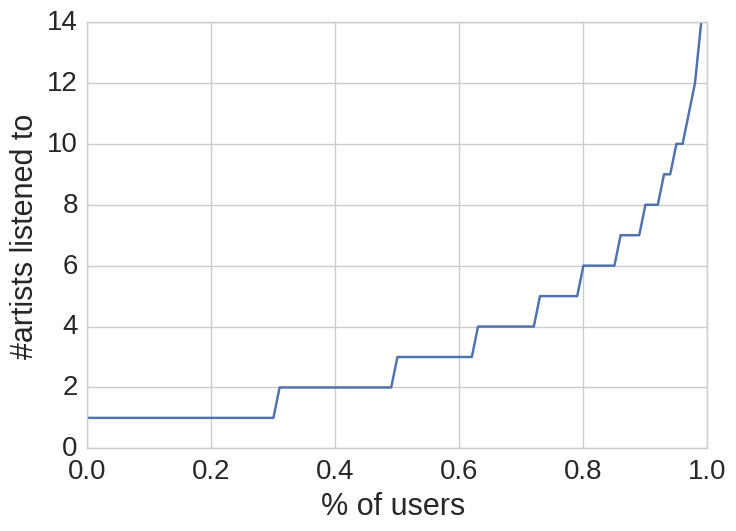

In [11]:
import matplotlib.pylab as plt

lists = sorted(dic.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.ylabel("#artists listened to")
plt.xlabel("% of users ")
plt.plot(x, y)
plt.show()

In [12]:
data_train = pd.concat([data_train[0], data_train[1], data_train[2]], axis = 1)
data_train.to_csv('data_session_train', sep = ' ', header = False, index = False)

In [13]:
data_test = pd.concat([data_test[1], data_test[2]], axis = 1)
data_test = data_test.sort_values(1)
data_test.to_csv('data_session_test', sep = ' ', header = False, index = False)